<a href="https://colab.research.google.com/github/adijdhv/PredictionModel/blob/main/Stockdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries
1.Pandas - for data manipulation and analysis, Offers Data Structures,operations for manipulating numerical tables and time series

2.math -provides Mathematical Functions

3.numpy - provides n-dimensional array

4.glob - to retrieve files with matching patterns

5.Matplotlib.pyplot - data visualization and graphical plotting library

6.seaborn - data visualization library based on matplotlib, provides high-level interface for Statistics and graphs

7.sklearn - for model building and Tools

8.tensorflow -  numerical computation and large-scale machine learning

9.kears - Keras is a neural network library which provides Highlevel API 




In [ ]:
#import libraries
import pandas as pd
import math
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import auth
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
# Using plotly.express
import plotly.express as px


#Connect to google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip '/content/sample_data/stockdata-20210321T182920Z-001.zip'

# Concat csv file

import files from the path */content/drive/MyDrive/stockdata* with the extension of .csv and append csv files in one Dataframe



In [ ]:
#Concate data
path = r'/content/drive/MyDrive/stockdata' # use your path
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
    #[sbin,icici,wipro,tcs][df1,df2,df3]

CombineStock = pd.concat(li, axis=0, ignore_index=True)

##Top 5 records of data
Top Five rows are Displayed of the dataframe with the 'Head()'


In [ ]:
#Top 5 rows using head
CombineStock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code
0,2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512.0,5.566488e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135.0,6.040391e+11,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095.0,4.509784e+11,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697.0,1.553756e+12,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107.0,2.739708e+12,NaN,NaN,NaN,NaN,NaN,NaN


#Describe the Statistical information

Describe() is used for Describing the dataframe. like Features, total Count of row,Mean Count, Standard deviation, minimum value maximum value. 


In [ ]:
#2. describe data
CombineStock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,464308.000000,464308.000000,464308.000000,464308.000000,464308.000000,464308.000000,464308.000000,4.643080e+05,4.643080e+05,2.346120e+05,4.321540e+05,432154.000000
mean,1231.116150,1232.590656,1250.983991,1212.800750,1231.267231,1231.430421,1231.991710,2.839687e+06,1.483413e+14,5.870079e+04,1.263564e+06,0.507684
std,2504.508634,2508.212122,2541.562009,2470.682073,2504.414871,2505.162569,2505.709636,6.602111e+06,3.022260e+14,6.417279e+04,2.725298e+06,0.189682
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,272.050000,272.500000,277.200000,267.350000,272.050000,272.100000,272.360000,2.128330e+05,1.547076e+13,2.107100e+04,1.227090e+05,0.371200
50%,554.100000,555.000000,564.700000,545.000000,554.475000,554.200000,554.645000,9.884235e+05,6.522255e+13,4.233650e+04,4.927430e+05,0.516400
75%,1217.500000,1218.000000,1238.000000,1197.000000,1217.300000,1217.650000,1217.650000,2.893960e+06,1.749810e+14,7.531100e+04,1.406273e+06,0.642500
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


##Historgram of all Arrival Delays
describe figure size which is 10cm in width and 5cm.

sns.distplot (Seaborn distplot) lets you show a histogram with a line on it which is helpful to understand the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


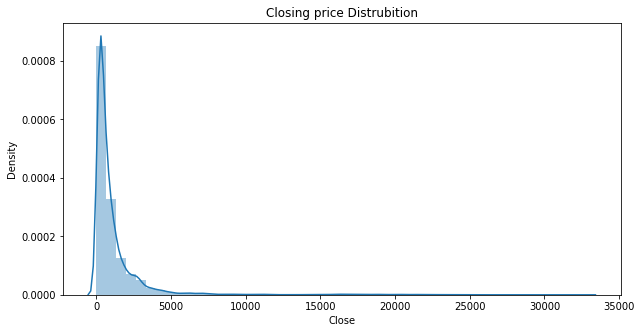

In [ ]:
# Density Plot and Histogram of all arrival delays
plt.figure(figsize=(10,5))
sns.distplot(CombineStock['Close'])
plt.title("Closing price Distrubition")
plt.show()

# Display Dataset information

In [ ]:
#1
CombineStock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464358 entries, 0 to 464357
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                464308 non-null  object 
 1   Symbol              464358 non-null  object 
 2   Series              464358 non-null  object 
 3   Prev Close          464308 non-null  float64
 4   Open                464308 non-null  float64
 5   High                464308 non-null  float64
 6   Low                 464308 non-null  float64
 7   Last                464308 non-null  float64
 8   Close               464308 non-null  float64
 9   VWAP                464308 non-null  float64
 10  Volume              464308 non-null  float64
 11  Turnover            464308 non-null  float64
 12  Trades              234612 non-null  float64
 13  Deliverable Volume  432154 non-null  float64
 14  %Deliverble         432154 non-null  float64
 15  Company Name        50 non-null   

## Count null values in each column

In [ ]:
#3.null,4.notnull
CombineStock.isnull().sum()

Date                      50
Symbol                     0
Series                     0
Prev Close                50
Open                      50
High                      50
Low                       50
Last                      50
Close                     50
VWAP                      50
Volume                    50
Turnover                  50
Trades                229746
Deliverable Volume     32204
%Deliverble            32204
Company Name          464308
Industry              464308
ISIN Code             464308
dtype: int64

##Heatmap to visualize null values

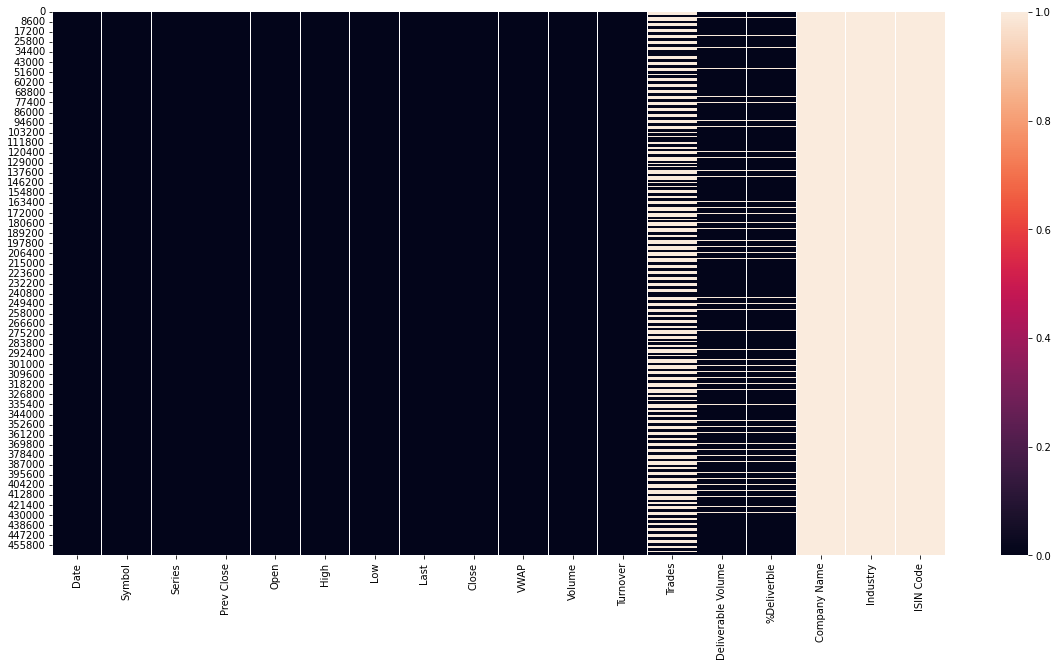

In [ ]:
plt.subplots(figsize=(20,10))
ax =sns.heatmap(CombineStock.isnull(),cbar = True)
plt.show()

## Comparing closeprice for each symbol

In [ ]:
plt.subplots(figsize=(20,10))
sns.histplot(CombineStock,x = CombineStock['Symbol'],y = CombineStock['Close'])
plt.xticks(rotation = 90)
plt.show()

## No of rows, Columns in the data

In [ ]:
CombineStock.shape


## Drop the column where null values > 60% 

In [ ]:
CombineStock.drop('ISIN Code',
  axis='columns', inplace=True)

In [ ]:
CombineStock.drop('Trades',
  axis='columns', inplace=True)

In [ ]:
CombineStock.drop('Industry',
  axis='columns', inplace=True)

In [ ]:
CombineStock.drop('Company Name',
  axis='columns', inplace=True)

In [ ]:
CombineStock.drop('Series',
  axis='columns', inplace=True)

#### Drop null rows of date

In [ ]:
CombineStock = CombineStock.dropna(axis=0, subset=['Date'])

In [ ]:
CombineStock.isnull().sum()

Date                      0
Symbol                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Deliverable Volume    32154
%Deliverble           32154
dtype: int64

In [ ]:
CombineStock.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2000-01-03,BRITANNIA,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512.0,5.566488e+11,NaN,NaN
1,2000-01-04,BRITANNIA,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135.0,6.040391e+11,NaN,NaN
2,2000-01-05,BRITANNIA,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095.0,4.509784e+11,NaN,NaN
3,2000-01-06,BRITANNIA,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697.0,1.553756e+12,NaN,NaN
4,2000-01-07,BRITANNIA,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107.0,2.739708e+12,NaN,NaN


## Fill null values using mean

In [ ]:
CombineStock.isnull().sum()

Date                      0
Symbol                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Deliverable Volume    32154
%Deliverble           32154
dtype: int64

In [ ]:
# Replace NaNs in column %Deliverble with the 
# mean of values in the same column 
def fillmean(colnm):
  mean_del = CombineStock[colnm].mean()
  CombineStock[colnm].fillna(value=mean_del, inplace=True)

In [ ]:
cname = ['Prev Close','Open','High','Low','Last','Close','VWAP','Volume']
for i in range(0,8):
  fillmean(cname[i])

## Convert turnover into integer type

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format 

In [ ]:
CombineStock['Turnover'].astype('int64')

0             556648765000
1             604039070000
2             450978430000
3            1553755555000
4            2739708030000
                ...       
464353     536039613910000
464354     622293086640000
464355     383954109000000
464356     441184558570000
464357    1441355166105000
Name: Turnover, Length: 464308, dtype: int64

In [ ]:
CombineStock.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2000-01-03,BRITANNIA,703.25,705.00,759.50,705.00,758.00,756.90,741.01,"7,512.00","556,648,765,000.00",nan,nan
1,2000-01-04,BRITANNIA,756.90,710.00,770.00,710.00,740.00,754.55,742.52,"8,135.00","604,039,070,000.00",nan,nan
2,2000-01-05,BRITANNIA,754.55,755.00,759.00,705.00,740.00,735.30,739.92,"6,095.00","450,978,430,000.00",nan,nan
3,2000-01-06,BRITANNIA,735.30,740.00,794.15,740.00,770.00,785.65,788.83,"19,697.00","1,553,755,555,000.00",nan,nan
4,2000-01-07,BRITANNIA,785.65,808.00,848.50,798.00,848.50,848.50,827.53,"33,107.00","2,739,708,030,000.00",nan,nan


# Correlation between columns

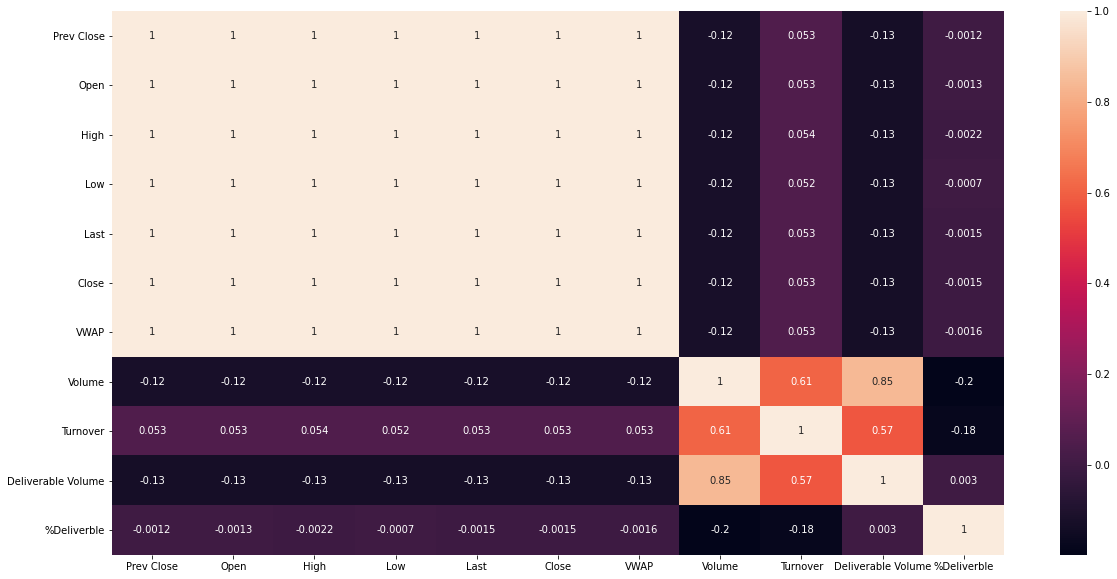

In [ ]:
#5.
plt.subplots(figsize=(20,10))
sns.heatmap(CombineStock.corr(),annot = True)

## Convert date datatype as datetime

In [ ]:
CombineStock['Date']= pd.to_datetime(CombineStock['Date'])

In [ ]:
#CombineStock.to_csv('/content/drive/MyDrive/Download/stockcleandata.csv',header = True)

## Unique companystock 

In [ ]:
companylist = CombineStock.Symbol.unique()
companylist

array(['BRITANNIA', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI', 'BHARTIARTL',
       'BPCL', 'HINDALC0', 'HINDALCO', 'GAIL', 'HINDLEVER', 'HINDUNILVR',
       'COALINDIA', 'GRASIM', 'UTIBANK', 'AXISBANK', 'DRREDDY',
       'BAJAJ-AUTO', 'ICICIBANK', 'HCLTECH', 'HDFCBANK', 'EICHERMOT',
       'HDFC', 'INDUSINDBK', 'ASIANPAINT', 'HEROHONDA', 'HEROMOTOCO',
       'CIPLA', 'MUNDRAPORT', 'ADANIPORTS', 'BAJAJFINSV', 'INFRATEL',
       'MARUTI', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'M&M',
       'NESTLEIND', 'INFOSYSTCH', 'INFY', 'IOC', 'ITC', 'LT', 'NTPC',
       'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA',
       'TELCO', 'TATAMOTORS', 'TISCO', 'TATASTEEL', 'TCS', 'TECHM',
       'TITAN', 'ULTRACEMCO', 'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL',
       'WIPRO', 'ZEETELE', 'ZEEL'], dtype=object)

## Sort and display

In [ ]:
# Sort DataFrame by date
CombineStock = CombineStock.sort_values('Date')
#setting index as date
CombineStock.index = CombineStock['Date']

# Double check the result
CombineStock.head()


,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2000-01-03,2000-01-03,BRITANNIA,703.25,705.00,759.50,705.00,758.00,756.90,741.01,"7,512.00","556,648,765,000.00",nan,nan
2000-01-03,2000-01-03,INFOSYSTCH,"14,467.75","15,625.00","15,625.20","15,625.00","15,625.20","15,625.20","15,625.18","5,137.00","8,026,657,140,000.00",nan,nan
2000-01-03,2000-01-03,IOC,254.00,260.00,273.25,250.00,267.35,270.85,258.55,"23,700.00","612,764,750,000.00",nan,nan
2000-01-03,2000-01-03,ITC,656.00,694.00,708.50,675.00,708.50,708.50,701.81,"562,715.00","39,491,742,195,000.00",nan,nan
2000-01-03,2000-01-03,KOTAKMAH,212.35,220.00,229.35,220.00,229.35,229.35,229.13,"7,086.00","162,364,030,000.00",nan,nan


In [ ]:
#6.
def plotter(code):
    global closing_stock
    plt.figure(figsize=(16,8))
    plt.subplot(211)
    company_close = CombineStock[CombineStock['Symbol']==code]
    plt.xlabel('Date')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Date')
    plt.grid(True)
    plt.plot(company_close['Close'], label='Close Price history')
    plt.show()

In [ ]:
#6.
def plotter(code):
    global closing_stock
    plt.figure(figsize=(16,8))
    plt.subplot(211)
    company_close = CombineStock[CombineStock['Symbol']==code]
    plt.xlabel('Time')
    plt.ylabel(code + " analysis")
    plt.title('column Vs Date')
    plt.grid(True)
    plt.plot(company_close[code])
    plt.show()

In [ ]:
def plotter(code):
    global column analyse
    plt.figure(figsize=(16,8))
    plt.subplot(211)
    datam = data[code]
    plt.xlabel('Time')
    plt.ylabel(code + "Analysis")
    plt.grid(True)
    plt.plot(datam)
    plt.show()

SyntaxError: ignored

 List of Companies youcan choose to see history  ['BRITANNIA' 'BAJAUTOFIN' 'BAJFINANCE' 'BHARTI' 'BHARTIARTL' 'BPCL'
 'HINDALC0' 'HINDALCO' 'GAIL' 'HINDLEVER' 'HINDUNILVR' 'COALINDIA'
 'GRASIM' 'UTIBANK' 'AXISBANK' 'DRREDDY' 'BAJAJ-AUTO' 'ICICIBANK'
 'HCLTECH' 'HDFCBANK' 'EICHERMOT' 'HDFC' 'INDUSINDBK' 'ASIANPAINT'
 'HEROHONDA' 'HEROMOTOCO' 'CIPLA' 'MUNDRAPORT' 'ADANIPORTS' 'BAJAJFINSV'
 'INFRATEL' 'MARUTI' 'JSWSTL' 'JSWSTEEL' 'KOTAKMAH' 'KOTAKBANK' 'M&M'
 'NESTLEIND' 'INFOSYSTCH' 'INFY' 'IOC' 'ITC' 'LT' 'NTPC' 'ONGC'
 'POWERGRID' 'RELIANCE' 'SBIN' 'SHREECEM' 'SUNPHARMA' 'TELCO' 'TATAMOTORS'
 'TISCO' 'TATASTEEL' 'TCS' 'TECHM' 'TITAN' 'ULTRACEMCO' 'UNIPHOS' 'UPL'
 'SESAGOA' 'SSLT' 'VEDL' 'WIPRO' 'ZEETELE' 'ZEEL']
Enter the Symbol to see closing stock price history: TCS


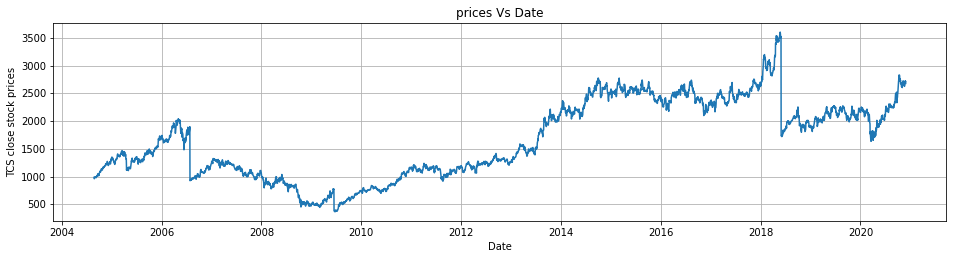

In [ ]:
print(" List of Companies youcan choose to see history ",companylist)
companyname = input("Enter the Symbol to see closing stock price history: ")
plotter(companyname)

# Choose the company to predict closing price

In [ ]:
def seleccom(name):
  companydata = (CombineStock[CombineStock['Symbol'] == name])
  return companydata

In [ ]:
print(CombineStock.Date.dtype)

datetime64[ns]


In [ ]:
inp = input("Choose the company ")
CData = seleccom(inp)

Choose the company TCS


In [ ]:
CData.isnull().sum()

Date                  0
Symbol                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
# Using graph_objects
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=CData['Date'], y=CData['VWAP'])])
fig.show()

# Why only Close Column?

In [ ]:
#setting index as date
new_data = CData.filter(['Close'])
new_data.head()

,Close
Date,
2004-08-25,987.95
2004-08-25,987.95
2004-08-26,979.00
2004-08-26,979.00
2004-08-27,962.65


In [ ]:
#plot
# plt.figure(figsize=(16,8))
# plt.plot(new_data['Close'], label='Close Price history')

In [ ]:
#sorting
new_data = new_data.sort_index(ascending=True, axis=0)

In [ ]:
new_data.head()

,Close
Date,
2004-08-25,987.95
2004-08-25,987.95
2004-08-26,979.00
2004-08-26,979.00
2004-08-27,962.65


In [ ]:
new_data.shape

(8074, 1)

In [ ]:
dataset = new_data.values
dataset[0:5]

array([[987.95],
       [987.95],
       [979.  ],
       [979.  ],
       [962.65]])

In [ ]:
#length of training data
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

6460

In [ ]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data[0:5]

array([[0.19193401],
       [0.19193401],
       [0.18916915],
       [0.18916915],
       [0.18411826]])

#Normalize data

In [ ]:
train = dataset[0:training_data_len,:]
valid = dataset[training_data_len:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

In [ ]:
#convert into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

## Why to reshape?

In [ ]:
print("previously shape ",x_train.shape)
#reshape
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))#explain
print("After reshape ",x_train.shape)

previously shape  (6400, 60)
After reshape  (6400, 60, 1)


# Build the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

##Compile the model
to reduce the validation loss optimizer adaptive model


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

## Fit the Model
training the model


In [ ]:
model.fit(x_train,y_train,epochs=1,batch_size=1)

6400/6400 [==============================] - 168s 23ms/step - loss: 0.0019


In [ ]:
#Save the model
model.save('/content/drive/MyDrive/stockdata/stock.h5')

#Creating Test data set


In [ ]:
test_data = scaled_data[training_data_len-60:,:]
#create datasetx_test,y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test = np.array(x_test)

In [ ]:
print("previously shape ",x_test.shape)
#reshape
x_test= np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))#explain
print("After reshape ",x_test.shape)

previously shape  (1614, 60)
After reshape  (1614, 60, 1)


fit(train) ----> scaled data(0 to 1)

model(xtest data) for predict -----> scaled_data(0 to 1)

output(Predicted closing price) -----> Original form closing price predict

ytest = predicted values -----> accuracy ++

ytest -----> Original form closing price

## Get the predicted values

In [ ]:
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

In [ ]:
#6.Get rmse value
rmse = np.sqrt(np.mean(predicted_price - y_test)**2)
rmse

80.42742572013921

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



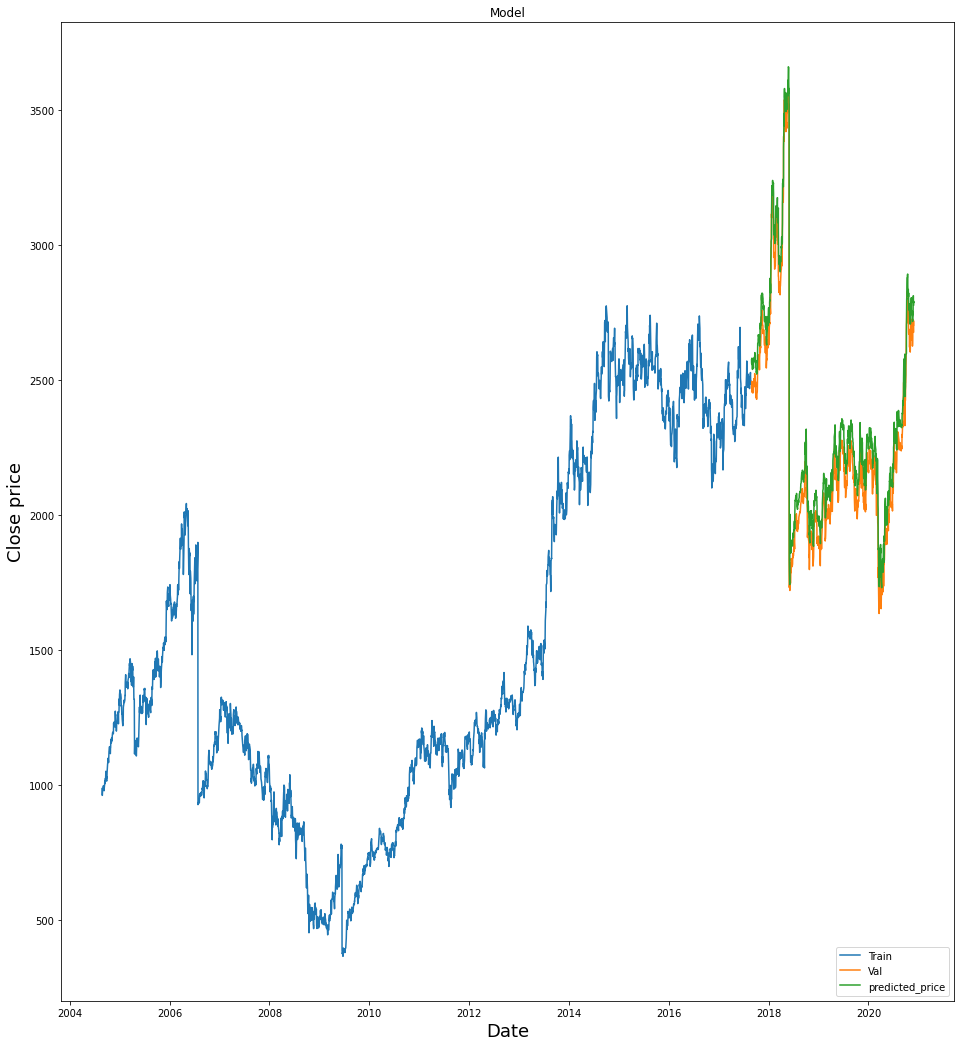

In [ ]:
#7.for plotting
train = new_data[:training_data_len]
valid = new_data[training_data_len:]
valid['predicted_price'] = predicted_price
plt.figure(figsize = (16,18))
plt.title("Model")
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close price',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predicted_price']])
plt.legend(['Train','Val','predicted_price'],loc = 'lower right')
plt.show()

In [ ]:
#8.
valid.sort_index(ascending=False, axis=0)

,Close,predicted_price
Date,,
2020-11-27,"2,679.65","2,779.11"
2020-11-27,"2,679.65","2,792.49"
2020-11-26,"2,720.60","2,787.51"
2020-11-26,"2,720.60","2,786.25"
2020-11-25,"2,701.30","2,799.00"
...,...,...
2017-08-31,"2,496.35","2,576.41"
2017-08-30,"2,484.55","2,561.41"
2017-08-30,"2,484.55","2,563.99"


In [ ]:
#7.for plotting
train = new_data[:training_data_len]
valid = new_data[training_data_len:]
valid['predicted_price'] = predicted_price
plt.figure(figsize = (10,12))
plt.title("Model")
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close price',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predicted_price']])
plt.legend(['Train','Val','predicted_price'],loc = 'lower right')
plt.show()

NameError: ignored